1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as la
import pandas as pd

In [2]:
N = 5000
x1 = np.random.normal(0, 1, N)
x2 = x1 + np.random.normal(0, 3, N)
x3 = 2*x1 + x2
dataset = np.array([x1,x2,x3])

cov_mat = np.cov(dataset)
eigval_cov , eigvec_cov = (la.eig(cov_mat))
print("Matrix whose columns are the eigenvectors:")
print(eigvec_cov, "\n")
print("Dispersion of the 3 features:")
print(np.std(dataset, axis = 1))

Matrix whose columns are the eigenvectors:
[[-0.11799994 -0.81649658  0.56516312]
 [-0.57418068 -0.40824829 -0.70968294]
 [-0.81018057  0.40824829  0.42064329]] 

Dispersion of the 3 features:
[1.01954912 3.14752773 4.24313368]


In [3]:
print("Eigenvalues of the Cov matrix:")
print(np.real(eigval_cov))

Eigenvalues of the Cov matrix:
[2.68728163e+01 1.08263335e-15 2.08356962e+00]


In [4]:
U, spectrum, Vt = la.svd(dataset)
print("Eigenvalues of the Cov matrix by SVD:")
print(spectrum**2/(N-1)) # is slightly different from Cov method

Eigenvalues of the Cov matrix by SVD:
[2.68781720e+01 2.08357026e+00 3.17555552e-31]


In [5]:
print("Weight of each eigenvalue (not SVD):")
print(np.real(eigval_cov/(np.sum(eigval_cov)))) # the variability of the set is given by 90-95% due to the principal component

Weight of each eigenvalue (not SVD):
[9.28044556e-01 3.73884142e-17 7.19554444e-02]


In [6]:
new_dataset = np.dot(eigvec_cov.T, dataset) # rotate the old dataset with eigenvectors matrix
print(new_dataset)

[[ 5.06638571e+00 -1.87038954e+00 -8.17535593e+00 ...  1.40410824e+00
   1.22257337e+00 -3.98137815e+00]
 [ 4.27150526e-16 -7.44225335e-16 -4.32661877e-16 ...  4.49515693e-16
   7.08586829e-16  1.33524139e-16]
 [-6.71675346e-01  1.73217135e+00  1.14304982e+00 ... -8.72852234e-01
  -1.76580665e+00 -8.07016433e-01]]


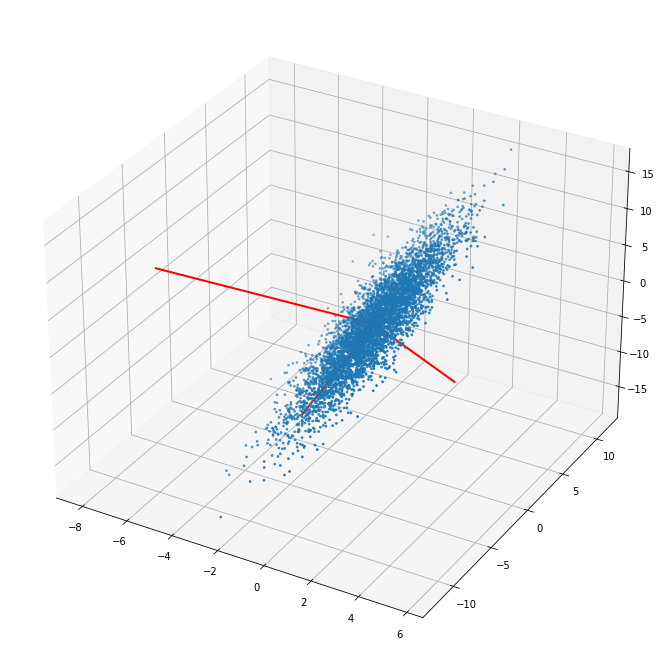

In [7]:
scale_factor = 10 # plot the old dataset in 3D helps seeing what's going on
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(projection='3d')
ax.scatter(dataset[0], dataset[1], dataset[2], s=3)
for li, vi in zip(eigval_cov, eigvec_cov.T):
    ax.plot([0, scale_factor*vi[0]], [0, scale_factor*vi[1]], [0, scale_factor*vi[2]], 'r-', lw=2) # eigenvectors not multiplicated by the respective eigenvalue

Text(0, 0.5, "$x_3'$")

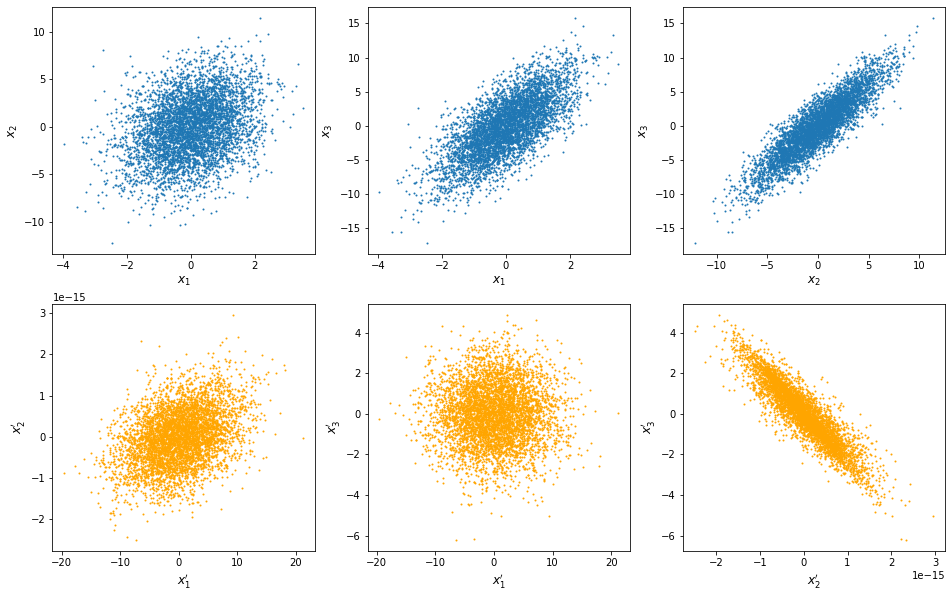

In [8]:
# Plot of the projections, and the "rotated data"
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows = 2, ncols = 3, figsize=(16,10))
ax1.scatter(dataset[0], dataset[1], s = 1)
ax1.set_xlabel("$x_1$", fontsize = 12)
ax1.set_ylabel("$x_2$", fontsize = 12)
ax2.scatter(dataset[0], dataset[2], s = 1)
ax2.set_xlabel("$x_1$", fontsize = 12)
ax2.set_ylabel("$x_3$", fontsize = 12)
ax3.scatter(dataset[1], dataset[2], s = 1)
ax3.set_xlabel("$x_2$", fontsize = 12)
ax3.set_ylabel("$x_3$", fontsize = 12)
ax4.scatter(new_dataset[0], new_dataset[1], s = 1, color = 'orange')
ax4.set_xlabel("$x_1'$", fontsize = 12)
ax4.set_ylabel("$x_2'$", fontsize = 12)
ax5.scatter(new_dataset[0], new_dataset[2], s = 1, color = 'orange')
ax5.set_xlabel("$x_1'$", fontsize = 12)
ax5.set_ylabel("$x_3'$", fontsize = 12)
ax6.scatter(new_dataset[1], new_dataset[2], s = 1, color = 'orange')
ax6.set_xlabel("$x_2'$", fontsize = 12)
ax6.set_ylabel("$x_3'$", fontsize = 12)

Text(0, 0.5, "$x_3'$")

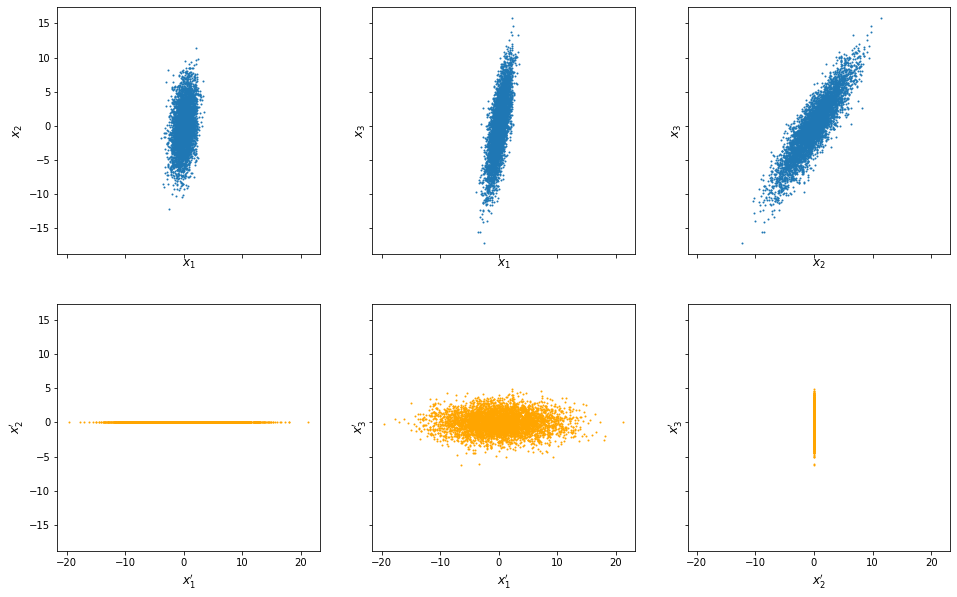

In [9]:
# Rescaled plot (as before but all with the same width)
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows = 2, ncols = 3, figsize=(16,10), sharex = True, sharey = True)
ax1.scatter(dataset[0], dataset[1], s = 1)
ax1.set_xlabel("$x_1$", fontsize = 12)
ax1.set_ylabel("$x_2$", fontsize = 12)
ax2.scatter(dataset[0], dataset[2], s = 1)
ax2.set_xlabel("$x_1$", fontsize = 12)
ax2.set_ylabel("$x_3$", fontsize = 12)
ax3.scatter(dataset[1], dataset[2], s = 1)
ax3.set_xlabel("$x_2$", fontsize = 12)
ax3.set_ylabel("$x_3$", fontsize = 12)
ax4.scatter(new_dataset[0], new_dataset[1], s = 1, color = 'orange')
ax4.set_xlabel("$x_1'$", fontsize = 12)
ax4.set_ylabel("$x_2'$", fontsize = 12)
ax5.scatter(new_dataset[0], new_dataset[2], s = 1, color = 'orange')
ax5.set_xlabel("$x_1'$", fontsize = 12)
ax5.set_ylabel("$x_3'$", fontsize = 12)
ax6.scatter(new_dataset[1], new_dataset[2], s = 1, color = 'orange')
ax6.set_xlabel("$x_2'$", fontsize = 12)
ax6.set_ylabel("$x_3'$", fontsize = 12)

In [10]:
dataset_2f = np.delete(new_dataset, 1, 0) # delete the x'_2 axis
print(dataset_2f)

[[ 5.06638571 -1.87038954 -8.17535593 ...  1.40410824  1.22257337
  -3.98137815]
 [-0.67167535  1.73217135  1.14304982 ... -0.87285223 -1.76580665
  -0.80701643]]


In [11]:
# A huge part of the variability of the dataset can be detected by only the first principal component, 
# that is the eigenvector described by x'_1 (as we can see in the plots).
# This is due to the dependence of x2 and x3 from x1, that makes every feature strongly correlated.
print("Principal component is x'_1:")
print(eigvec_cov.T[0])

Principal component is x'_1:
[-0.11799994 -0.57418068 -0.81018057]


2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [12]:
rand_noise = np.random.normal(0, 0.05, (10, N))
dataset_noise = np.concatenate((dataset, rand_noise), axis = 0)
print(dataset_noise)

[[-9.77439352e-01  1.19966521e+00  1.61070112e+00 ... -6.58988579e-01
  -1.14223238e+00  1.37064703e-02]
 [-2.43234428e+00 -1.55350902e-01  3.88292852e+00 ... -1.86763493e-01
   5.51184843e-01  2.85875623e+00]
 [-4.38722299e+00  2.24397952e+00  7.10433076e+00 ... -1.50474065e+00
  -1.73327991e+00  2.88616917e+00]
 ...
 [ 4.07223786e-02  2.21716567e-03  3.08914924e-02 ...  4.56253483e-02
  -7.07447761e-02  3.40942563e-02]
 [-7.19092113e-02 -8.46648074e-03  4.50741345e-03 ...  2.70258235e-03
   1.45620588e-02 -1.76498682e-02]
 [-8.22439254e-02 -2.89914444e-02  8.08036430e-03 ... -2.08730819e-02
   3.03476828e-02  3.72395008e-02]]


In [13]:
cov_mat = np.cov(dataset_noise)
eigval_cov , eigvec_cov = (la.eig(cov_mat))
print("Matrix whose columns are the eigenvectors:")
print(eigvec_cov, "\n")
print("Dispersion of the 13 features:")
print(np.std(dataset_noise, axis = 1))

Matrix whose columns are the eigenvectors:
[[-1.17999941e-01 -5.65162667e-01  8.16496581e-01 -3.33095254e-04
  -5.86430019e-05  2.95770805e-04 -2.60955625e-04  2.81250068e-04
   1.79646988e-04  3.10823005e-04 -1.48061675e-04  7.13918074e-05
   4.48948339e-05]
 [-5.74180617e-01  7.09682540e-01  4.08248290e-01  4.02735091e-04
  -1.48879694e-04 -3.22949064e-04  3.44109614e-04 -2.18735509e-04
  -5.81619740e-05 -3.89655598e-04  1.72515251e-04 -7.05837554e-05
  -7.83109361e-06]
 [-8.10180498e-01 -4.20642794e-01 -4.08248290e-01 -2.63455417e-04
  -2.66165697e-04  2.68592546e-04 -1.77801637e-04  3.43764626e-04
   3.01132002e-04  2.31990413e-04 -1.23608100e-04  7.21998594e-05
   8.19585741e-05]
 [ 8.34443194e-06 -3.10293543e-04 -3.37602267e-16 -4.28305366e-01
  -4.79109187e-01 -4.92414312e-01  8.58572004e-02 -4.90609291e-01
  -5.82303947e-02  5.10173914e-02  2.74670204e-01  2.20230033e-02
  -1.20605669e-01]
 [-2.36273248e-04  2.04442837e-04 -3.90600175e-16  3.37882182e-02
   3.21861230e-01  6.05

In [14]:
print("Eigenvalues of the Cov matrix:")
print(np.real(eigval_cov))

Eigenvalues of the Cov matrix:
[2.68728215e+01 2.08357272e+00 4.61096767e-16 2.28957495e-03
 2.68231349e-03 2.37491350e-03 2.39135820e-03 2.61960940e-03
 2.60852971e-03 2.55606126e-03 2.45179764e-03 2.49123068e-03
 2.47409305e-03]


In [15]:
U, spectrum, Vt = la.svd(dataset_noise)
print("Eigenvalues of the Cov matrix by SVD:")
print(spectrum**2/(N-1)) # is slightly different from Cov method

Eigenvalues of the Cov matrix by SVD:
[2.68781773e+01 2.08357337e+00 2.68471992e-03 2.62066675e-03
 2.60865876e-03 2.55609011e-03 2.49137353e-03 2.47412580e-03
 2.45179765e-03 2.39165767e-03 2.37616539e-03 2.29037755e-03
 4.40911590e-31]


In [16]:
print("Weight of each eigenvalue (not SVD):")
print(np.real(eigval_cov/(np.sum(eigval_cov)))) # the variability of the set is given by 90-95% due to the principal component

Weight of each eigenvalue (not SVD):
[9.27245853e-01 7.18936106e-02 1.59101293e-17 7.90017110e-05
 9.25531417e-05 8.19463148e-05 8.25137386e-05 9.03895392e-05
 9.00072346e-05 8.81968125e-05 8.45991998e-05 8.59598356e-05
 8.53685021e-05]


In [17]:
new_dataset_noise = np.dot(eigvec_cov.T, dataset_noise)
print(new_dataset_noise)

[[ 5.06643238e+00 -1.87040596e+00 -8.17534772e+00 ...  1.40411306e+00
   1.22260284e+00 -3.98138927e+00]
 [ 6.71766152e-01 -1.73215683e+00 -1.14305625e+00 ...  8.72863792e-01
   1.76587378e+00  8.06968704e-01]
 [ 2.44732770e-16  3.29467038e-16 -7.77080902e-16 ... -2.32389727e-16
  -3.45671094e-16 -6.91262524e-16]
 ...
 [-3.15722493e-02  3.05271535e-02  7.58553137e-02 ... -9.61298565e-04
   3.68612094e-02  1.00715224e-03]
 [ 5.69250360e-02 -9.44444439e-03 -3.62620082e-03 ... -2.89791593e-02
   2.02275950e-03  1.01306672e-01]
 [ 1.75533291e-02 -1.95155972e-02 -4.90636913e-02 ... -7.23593713e-02
   7.15011687e-02  1.57204458e-02]]


Text(0, 0.5, "$x_3'$")

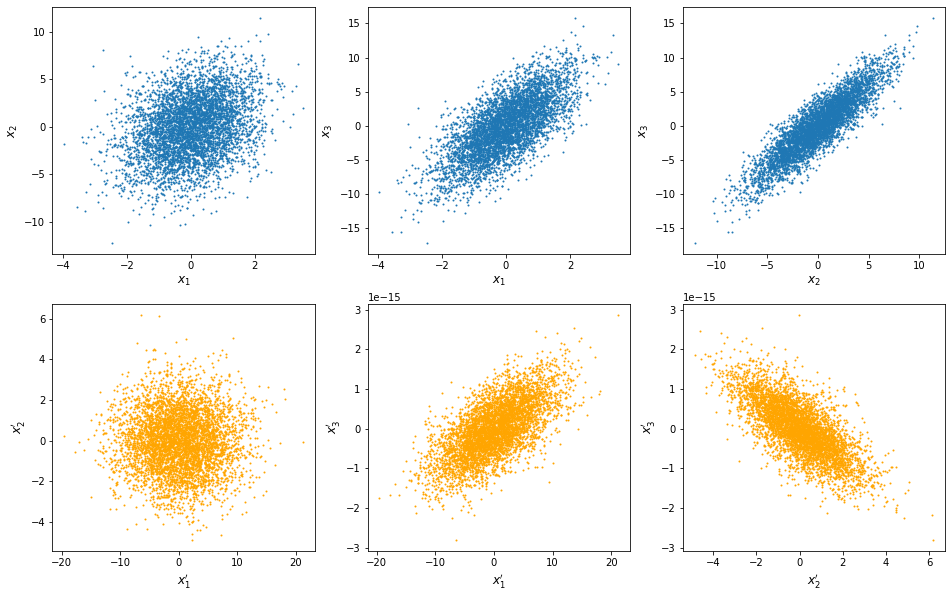

In [18]:
# Plot of the projections, and the "rotated data"
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows = 2, ncols = 3, figsize=(16,10))
ax1.scatter(dataset_noise[0], dataset_noise[1], s = 1)
ax1.set_xlabel("$x_1$", fontsize = 12)
ax1.set_ylabel("$x_2$", fontsize = 12)
ax2.scatter(dataset_noise[0], dataset_noise[2], s = 1)
ax2.set_xlabel("$x_1$", fontsize = 12)
ax2.set_ylabel("$x_3$", fontsize = 12)
ax3.scatter(dataset_noise[1], dataset_noise[2], s = 1)
ax3.set_xlabel("$x_2$", fontsize = 12)
ax3.set_ylabel("$x_3$", fontsize = 12)
ax4.scatter(new_dataset_noise[0], new_dataset_noise[1], s = 1, color = 'orange')
ax4.set_xlabel("$x_1'$", fontsize = 12)
ax4.set_ylabel("$x_2'$", fontsize = 12)
ax5.scatter(new_dataset_noise[0], new_dataset_noise[2], s = 1, color = 'orange')
ax5.set_xlabel("$x_1'$", fontsize = 12)
ax5.set_ylabel("$x_3'$", fontsize = 12)
ax6.scatter(new_dataset_noise[1], new_dataset_noise[2], s = 1, color = 'orange')
ax6.set_xlabel("$x_2'$", fontsize = 12)
ax6.set_ylabel("$x_3'$", fontsize = 12)

Text(0, 0.5, "$x_3'$")

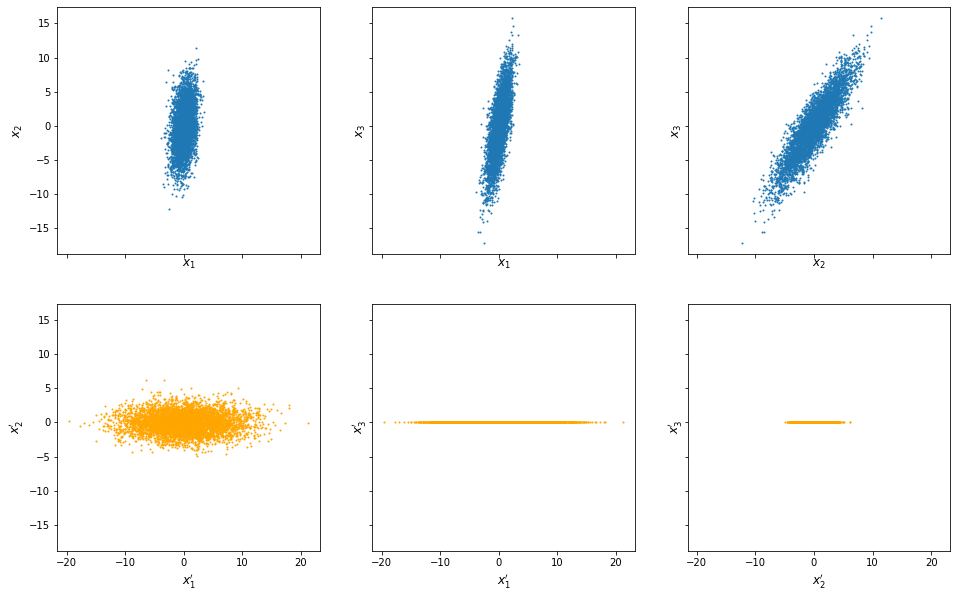

In [19]:
# Rescaled plot (as before but all with the same width)
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows = 2, ncols = 3, figsize=(16,10), sharex = True, sharey = True)
ax1.scatter(dataset_noise[0], dataset_noise[1], s = 1)
ax1.set_xlabel("$x_1$", fontsize = 12)
ax1.set_ylabel("$x_2$", fontsize = 12)
ax2.scatter(dataset_noise[0], dataset_noise[2], s = 1)
ax2.set_xlabel("$x_1$", fontsize = 12)
ax2.set_ylabel("$x_3$", fontsize = 12)
ax3.scatter(dataset_noise[1], dataset_noise[2], s = 1)
ax3.set_xlabel("$x_2$", fontsize = 12)
ax3.set_ylabel("$x_3$", fontsize = 12)
ax4.scatter(new_dataset_noise[0], new_dataset_noise[1], s = 1, color = 'orange')
ax4.set_xlabel("$x_1'$", fontsize = 12)
ax4.set_ylabel("$x_2'$", fontsize = 12)
ax5.scatter(new_dataset_noise[0], new_dataset_noise[2], s = 1, color = 'orange')
ax5.set_xlabel("$x_1'$", fontsize = 12)
ax5.set_ylabel("$x_3'$", fontsize = 12)
ax6.scatter(new_dataset_noise[1], new_dataset_noise[2], s = 1, color = 'orange')
ax6.set_xlabel("$x_2'$", fontsize = 12)
ax6.set_ylabel("$x_3'$", fontsize = 12)

In [20]:
# Everything as before, the only thing changed is that the second principal component is now x'_2 whereas before was x'_3
print("Principal component is x'_1:")
print(eigvec_cov.T[0])

Principal component is x'_1:
[-1.17999941e-01 -5.74180617e-01 -8.10180498e-01  8.34443194e-06
 -2.36273248e-04 -1.04915527e-05 -1.28757626e-04  1.73861142e-04
 -1.48893423e-04 -1.35795420e-04 -1.50657789e-04 -6.87407635e-05
 -1.53101902e-04]


3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


In [22]:
x = np.array([np.sin(0.01*i) for i in range(2000)]) # armonic motion with a certain frequency
t = 0.01*np.arange(2000)
y = np.random.normal(loc = 0, scale = 0.02, size = 2000)
z = np.random.normal(loc = 0, scale = 0.01, size = 2000)
print(x)

[0.         0.00999983 0.01999867 ... 0.90029383 0.90460157 0.90881885]


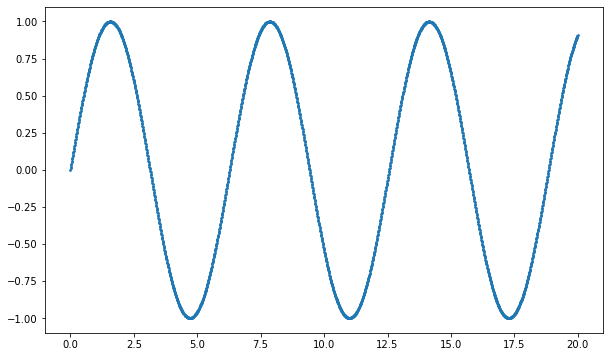

In [23]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(t, x, s = 3)

In [24]:
from math import pi
from scipy.spatial.transform import Rotation as R # using a rotation to rotate casually the (x,y,z) system of reference
alfa = 2*pi*np.random.random(1)[0]
beta = 2*pi*np.random.random(1)[0]
gamma = 2*pi*np.random.random(1)[0]
r = R.from_euler('xyz', [alfa, beta, gamma])
V = r.as_matrix()

In [25]:
dataset = np.array([x,y,z])
dataset_rot = np.dot(V.T, dataset)

Text(0, 0.5, "$z'$")

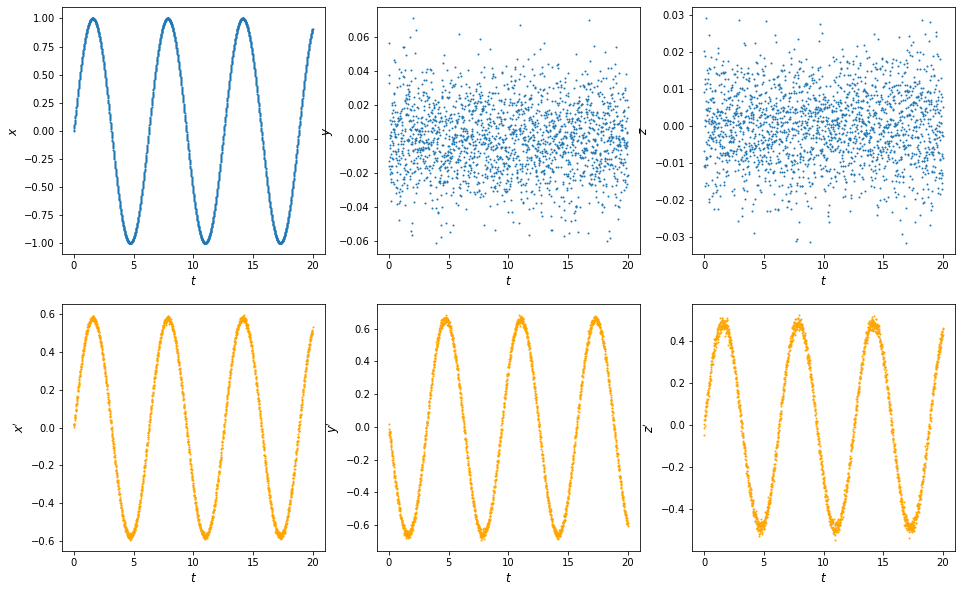

In [27]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows = 2, ncols = 3, figsize=(16,10))
ax1.scatter(t, dataset[0], s = 1)
ax1.set_xlabel("$t$", fontsize = 12)
ax1.set_ylabel("$x$", fontsize = 12)
ax2.scatter(t, dataset[1], s = 1)
ax2.set_xlabel("$t$", fontsize = 12)
ax2.set_ylabel("$y$", fontsize = 12)
ax3.scatter(t, dataset[2], s = 1)
ax3.set_xlabel("$t$", fontsize = 12)
ax3.set_ylabel("$z$", fontsize = 12)
ax4.scatter(t, dataset_rot[0], s = 1, color = 'orange')
ax4.set_xlabel("$t$", fontsize = 12)
ax4.set_ylabel("$x'$", fontsize = 12)
ax5.scatter(t, dataset_rot[1], s = 1, color = 'orange')
ax5.set_xlabel("$t$", fontsize = 12)
ax5.set_ylabel("$y'$", fontsize = 12)
ax6.scatter(t, dataset_rot[2], s = 1, color = 'orange')
ax6.set_xlabel("$t$", fontsize = 12)
ax6.set_ylabel("$z'$", fontsize = 12)

In [30]:
cov_mat = np.cov(dataset_rot)
eigval_cov , eigvec_cov = (la.eig(cov_mat))
print("Matrix whose columns are the eigenvectors:")
print(eigvec_cov, "\n")
print("Dispersion of the 3 features:")
print(np.std(dataset_rot, axis = 1))

Matrix whose columns are the eigenvectors:
[[-0.57388445  0.8160399  -0.06881513]
 [ 0.65693368  0.50890286  0.55628771]
 [-0.48897318 -0.27403789  0.82813554]] 

Dispersion of the 3 features:
[0.40164529 0.45984435 0.34258491]


In [31]:
dataset_p = np.dot(eigvec_cov.T, dataset_rot)
print(dataset_p)

[[ 1.04727081e-05 -1.00252171e-02 -1.99939987e-02 ... -9.00283951e-01
  -9.04592832e-01 -9.08826758e-01]
 [ 1.97813260e-02  1.10767702e-02 -1.12201451e-02 ... -3.32094587e-03
  -9.32482136e-03  5.89067366e-03]
 [ 1.66869621e-02 -5.62978098e-02  1.28252285e-02 ...  2.18764186e-02
   2.10928628e-02 -1.79607002e-02]]


Text(0, 0.5, "$z'''$")

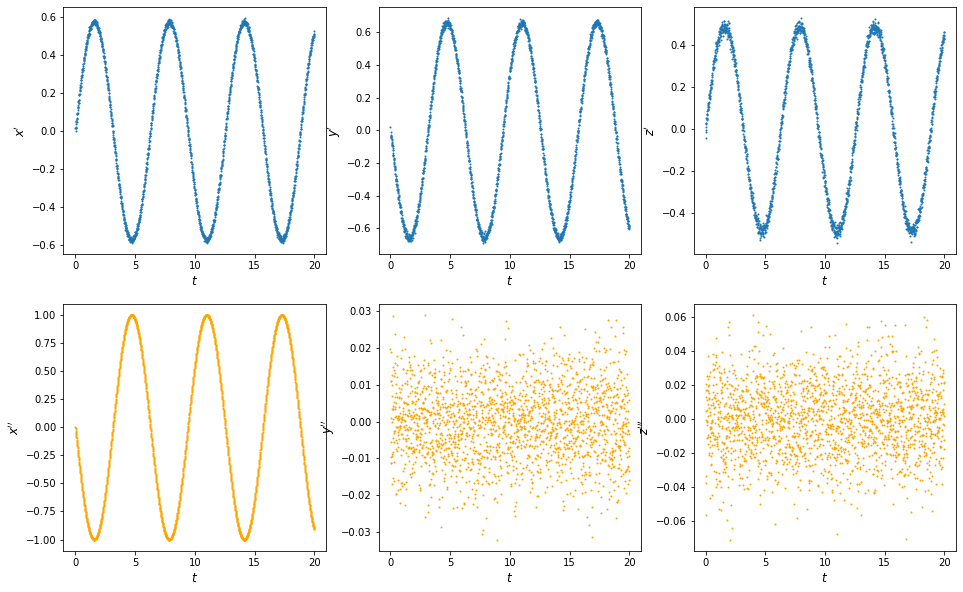

In [33]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows = 2, ncols = 3, figsize=(16,10))
ax1.scatter(t, dataset_rot[0], s = 1)
ax1.set_xlabel("$t$", fontsize = 12)
ax1.set_ylabel("$x'$", fontsize = 12)
ax2.scatter(t, dataset_rot[1], s = 1)
ax2.set_xlabel("$t$", fontsize = 12)
ax2.set_ylabel("$y'$", fontsize = 12)
ax3.scatter(t, dataset_rot[2], s = 1)
ax3.set_xlabel("$t$", fontsize = 12)
ax3.set_ylabel("$z'$", fontsize = 12)
ax4.scatter(t, dataset_p[0], s = 1, color = 'orange')
ax4.set_xlabel("$t$", fontsize = 12)
ax4.set_ylabel("$x''$", fontsize = 12)
ax5.scatter(t, dataset_p[1], s = 1, color = 'orange')
ax5.set_xlabel("$t$", fontsize = 12)
ax5.set_ylabel("$y''$", fontsize = 12)
ax6.scatter(t, dataset_p[2], s = 1, color = 'orange')
ax6.set_xlabel("$t$", fontsize = 12)
ax6.set_ylabel("$z'''$", fontsize = 12)

In [ ]:
# We can see that (x'', y'', z'') is very similar to the original system (x, y, z) less than for some reflection of the axis

4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [21]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 

"wget" non è riconosciuto come comando interno o esterno,
 un programma eseguibile o un file batch.
"wget" non è riconosciuto come comando interno o esterno,
 un programma eseguibile o un file batch.
